## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## Importing data

In [2]:
data=pd.read_csv("netflix_titles.csv")
print(data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

## Basic Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Data Cleaning

Empty Cells

In [4]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Check Duplicates

In [5]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


## Plot a Graph

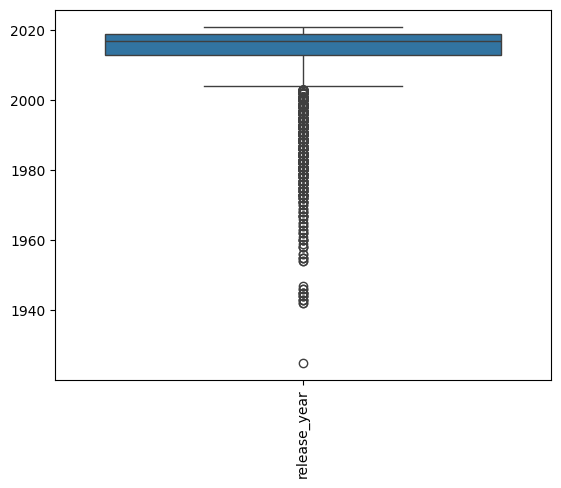

In [6]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Drop the unnecessary column

In [7]:
data.drop(columns=["Unnamed: 0"], inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

## Encode categorical variables

In [ ]:
label_encoders = {}
for col in ["work_type", "smoking_status"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

## Statistical Analysis

In [17]:
print(data.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


## Separate features and target

In [24]:
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder

file_path_netflix = "netflix_titles.csv"  

if not os.path.exists(file_path_netflix):
    raise FileNotFoundError(f"Error: The file {file_path_netflix} was not found.")

df_netflix = pd.read_csv(file_path_netflix)


df_netflix_cleaned = df_netflix.drop(columns=["show_id", "title", "description", "date_added", "cast", "director"], errors="ignore")

df_netflix_cleaned = df_netflix_cleaned.fillna("Unknown")

def convert_duration(value):
    if "min" in value:
        return int(value.replace(" min", "")) 
    elif "Season" in value:
        return int(value.split()[0]) * 60  
    return 0 

df_netflix_cleaned["duration"] = df_netflix_cleaned["duration"].astype(str).apply(convert_duration)

categorical_cols = ["rating", "listed_in", "country"]


encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_features = encoder.fit_transform(df_netflix_cleaned[categorical_cols])


encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

df_netflix_encoded = df_netflix_cleaned.drop(columns=categorical_cols).reset_index(drop=True)
df_netflix_encoded = pd.concat([df_netflix_encoded, encoded_df], axis=1)

target_column = "type" 
X = df_netflix_encoded.drop(columns=[target_column])
y = df_netflix_encoded[target_column]

print("Features (X) Info:")
print(X.info())
print("\nTarget (y) Info:")
print(y.value_counts())


Features (X) Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Columns: 1283 entries, release_year to country_Zimbabwe
dtypes: float64(1281), int64(2)
memory usage: 86.2 MB
None

Target (y) Info:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


## Normalize numerical columns

In [23]:
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

file_path_netflix = "netflix_titles.csv" 
if not os.path.exists(file_path_netflix):
    raise FileNotFoundError(f"Error: The file {file_path_netflix} was not found.")

df_netflix = pd.read_csv(file_path_netflix)

df_netflix_cleaned = df_netflix.drop(columns=["show_id", "title", "description", "date_added", "cast", "director"], errors="ignore")

df_netflix_cleaned = df_netflix_cleaned.fillna("Unknown")

def convert_duration(value):
    if "min" in value:
        return int(value.replace(" min", "")) 
    elif "Season" in value:
        return int(value.split()[0]) * 60 
    return 0  

df_netflix_cleaned["duration"] = df_netflix_cleaned["duration"].astype(str).apply(convert_duration)

categorical_cols = ["rating", "listed_in", "country"]


encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_features = encoder.fit_transform(df_netflix_cleaned[categorical_cols])


encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

df_netflix_encoded = df_netflix_cleaned.drop(columns=categorical_cols).reset_index(drop=True)
df_netflix_encoded = pd.concat([df_netflix_encoded, encoded_df], axis=1)

target_column = "type"  
X = df_netflix_encoded.drop(columns=[target_column])
y = df_netflix_encoded[target_column]

numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Features (X) Info:")
print(X.info())
print("\nTarget (y) Info:")
print(y.value_counts())


Features (X) Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Columns: 1283 entries, release_year to country_Zimbabwe
dtypes: float64(1283)
memory usage: 86.2 MB
None

Target (y) Info:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


## Split into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##  Train a Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

##  Predictions and evaluation

In [27]:
from sklearn.metrics import accuracy_score, classification_report


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.9954597048808173,
 '              precision    recall  f1-score   support\n\n       Movie       1.00      1.00      1.00      1227\n     TV Show       0.99      0.99      0.99       535\n\n    accuracy                           1.00      1762\n   macro avg       0.99      0.99      0.99      1762\nweighted avg       1.00      1.00      1.00      1762\n')